In [11]:
library ("dplyr")
library ("readr")
# install.packages("outliers")
# install.packages("lmtest")
# install.packages("car")
# install.packages("mctest")
# install.packages("caTools")
# install.packages("EnvStats")
# install.packages("gam")
# install.packages("Metrics")
install.packages("pscl")
library ("outliers")
library ("ggplot2")
library("EnvStats")
library("gam")
library(stats)
library(mgcv)
library(MASS)
library(lmtest)
library(car)
library(Metrics)
library(pscl)


Happiness <- read_csv("WorldHappiness_Corruption_2015_2020.csv")

head(Happiness)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis

Rows: 792 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, continent
dbl (11): happiness_score, gdp_per_capita, family, health, freedom, generosi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Norway,7.537,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027,Europe,2015,0,88
Denmark,7.522,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707,Europe,2015,0,91
Iceland,7.504,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715,Europe,2015,0,79
Switzerland,7.494,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716,Europe,2015,0,86
Finland,7.469,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182,Europe,2015,0,90
Netherlands,7.377,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,2.294804,Europe,2015,0,84


In [3]:
# Membersihkan data dari nilai NA dan memilih kolom yang ingin digunakan

Happiness_clean <- na.omit(Happiness)
Happiness_clean <- dplyr::select(Happiness_clean, -family, -freedom:-continent, -social_support)
numeric_set <- dplyr::select(Happiness_clean, -Country)
colnames(numeric_set)[2] <- "GDP"
colnames(numeric_set)[5] <- "CPI"

head(numeric_set)

happiness_score,GDP,health,Year,CPI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.537,1.616463,0.7966665,2015,88
7.522,1.482383,0.7925655,2015,91
7.504,1.480633,0.8335521,2015,79
7.494,1.564980,0.8581313,2015,86
7.469,1.443572,0.8091577,2015,90
7.377,1.503945,0.8106961,2015,84


## 1. Assumption Test

In [4]:
# Membuat model regresi terlebih dahulu
mainmodel <- lm(happiness_score ~ health + CPI + GDP, data = numeric_set)
summary(mainmodel)


Call:
lm(formula = happiness_score ~ health + CPI + GDP, data = numeric_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16291 -0.41038  0.01943  0.43761  1.53723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.880989   0.066748  43.162  < 2e-16 ***
health      1.433487   0.153679   9.328  < 2e-16 ***
CPI         0.012017   0.001629   7.376 4.13e-13 ***
GDP         1.215797   0.099682  12.197  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6189 on 788 degrees of freedom
Multiple R-squared:  0.6983,	Adjusted R-squared:  0.6972 
F-statistic:   608 on 3 and 788 DF,  p-value: < 2.2e-16


Diatas adalah hasil model linear regresi dari semua variabel yang sudah dibuat menggunakan lm() method. 

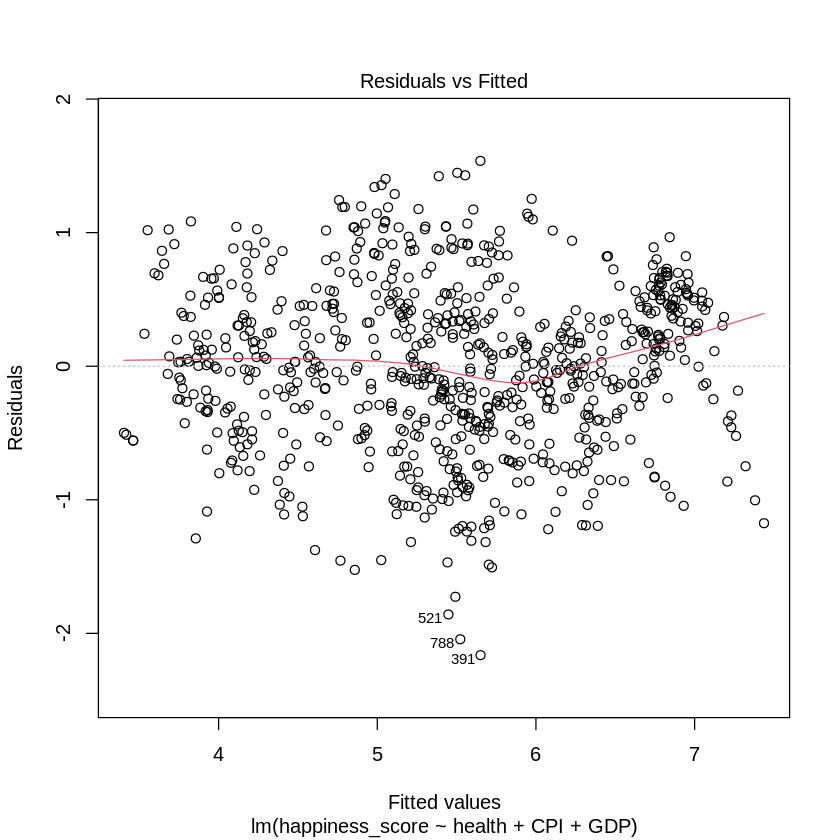

In [ ]:
plot(mainmodel, 1)

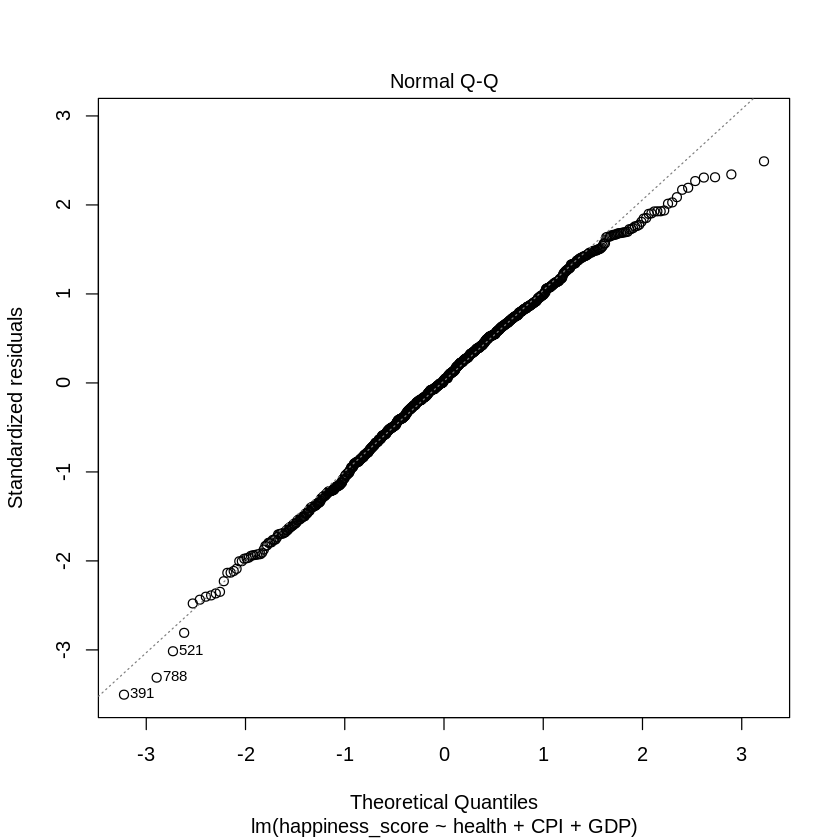

In [ ]:
plot(mainmodel, 2)

### 1.1 Uji Normalitas

In [ ]:
# Uji Normalitas dengan Shapiro-Wilks Test
shapiro <- studres(mainmodel)
shapiro.test(shapiro)


	Shapiro-Wilk normality test

data:  shapiro
W = 0.99487, p-value = 0.00921


#### 𝐇ₒ = Data mempunyai distribusi normal
Dengan hipotesis seperti ini, kita lihat nilai dari p-valuenya untuk menentukan apakah hipotesis akan diambil. Jika p-value mempunyai nilai kurang dari (<) atau sama dengan (=) *significance level* atau *alpha* (α) yang bernilai 0.05, maka test akan menolak hipotesis. 

Karena p-value yang kita dapatkan adalah 0.00921, yang lebih kecil dari α, maka hipotesis ditolak, dan dapat kita asumsikan bahwa data **tidak berdistribusi normal**



### 1.2 Uji Homoskedastisitas

In [ ]:
# Uji Homoscedasticity dengan Breusch-Pagan test dan ncvTest
bptest(mainmodel)


	studentized Breusch-Pagan test

data:  mainmodel
BP = 2.1864, df = 3, p-value = 0.5346


#### 𝐇ₒ = Data mempunyai homoskedastisitas
Dengan hipotesis seperti ini, kita lihat nilai dari p-valuenya untuk menentukan apakah hipotesis akan diambil. Jika p-value mempunyai nilai kurang dari (<) atau sama dengan (=) significance level atau alpha (α) yang bernilai 0.05, maka test akan menolak hipotesis.

Karena p-value yang kita dapatkan adalah 0.5346, yang lebih besar dari α, maka hipotesis diterima, dan dapat kita asumsikan bahwa **data mempunyai homoskedastisitas**.

### 1.3 Uji independen

In [ ]:
# Uji asumsi independen dengan Durbin Watson Test
dwtest(mainmodel)


	Durbin-Watson test

data:  mainmodel
DW = 1.4748, p-value = 4.575e-14
alternative hypothesis: true autocorrelation is greater than 0


#### 𝐇ₒ = Data tidak mempunyai korelasi satu dengan yang lain
Dengan hipotesis seperti ini, kita lihat nilai dari p-valuenya untuk menentukan apakah hipotesis akan diambil. Jika p-value mempunyai nilai kurang dari (<) atau sama dengan (=) significance level atau alpha (α) yang bernilai 0.05, maka test akan menolak hipotesis.

Karena p-value yang kita dapatkan adalah 4.088e-14, yang lebih kecil dari α, maka hipotesis ditolak, dan dapat kita asumsikan bahwa **data mempunyai korelasi atau bersifat *autocorrelated***.

### 1.4 Uji Multikolinearitas

In [ ]:
# Uji multicollinearity dengan VIF
vif(mainmodel)

health      CPI      GDP 
2.630626 2.085928 3.053361

Untuk VIF terdapat 3 indikator yang bisa digunakan mengenai value yg keluar :
*   Nilai 1 menunjukkan tidak ada korelasi antara variabel independen dengan variabel
*   Nilai 1 sampai 5 menunjukkan korelasi yang sedang antara variabel independen yang satu dengan variabel lainnya
*   Nilai lebih besar 5 menunjukkan adanya korelasi yang tinggi, bahkan terlalu berlebihan antara variabel independen yang satu dengan lainnya

Dari hasil VIF, terlihat bahwa semua variabel independen mempunyai nilai diantara 1-5 yang sesuai dengan indikator kedua. Hal ini berarti terdapat korelasi sedang diantara semua variabel independen dan tidak dibutuhkan pembersihan lagi.


## 2. Checking for Outliers

### 2.1 Grubbs Outlier

#### 2.1.1 Happiness Score

In [ ]:
grubbs.test(numeric_set$happiness_score)


	Grubbs test for one outlier

data:  numeric_set$happiness_score
G = 2.58410, U = 0.99155, p-value = 1
alternative hypothesis: lowest value 2.566900015 is an outlier


#### 2.1.2 GDP

In [ ]:
grubbs.test(numeric_set$GDP)


	Grubbs test for one outlier

data:  numeric_set$GDP
G = 3.02452, U = 0.98842, p-value = 0.9608
alternative hypothesis: highest value 2.096 is an outlier


#### 2.1.3. Health

In [ ]:
grubbs.test(numeric_set$health)


	Grubbs test for one outlier

data:  numeric_set$health
G = 2.79294, U = 0.99013, p-value = 1
alternative hypothesis: lowest value 0 is an outlier


#### 2.1.4. CPI Score

In [ ]:
grubbs.test(numeric_set$CPI)


	Grubbs test for one outlier

data:  numeric_set$CPI
G = 2.39240, U = 0.99275, p-value = 1
alternative hypothesis: highest value 91 is an outlier


### 2.2 Generalized ESD Test

#### 2.2.1. Happiness Score

In [ ]:
vector_happiness <- pull(numeric_set, happiness_score)
rosner <- rosnerTest(vector_happiness, k=5, warn= TRUE)
rosner$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,5.473310,1.124726,2.5669,792,2.584105,3.981859,FALSE
1,5.476984,1.120671,2.8390,264,2.353932,3.981540,FALSE
2,5.480323,1.117437,2.9050,132,2.304671,3.981221,FALSE
3,5.483587,1.114371,2.9050,263,2.313941,3.980902,FALSE
4,5.486860,1.111279,2.9050,528,2.323323,3.980582,FALSE


Variabel happiness_score tidak mempunyai outlier, hal ini bisa terlihat dari kolom 'outlier' yang menunjukkan isi 'false'.

#### 2.2.2. GDP

In [ ]:
vector_happiness <- pull(numeric_set, GDP)
rosnerTest(vector_happiness, k=5)$all.stats


i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,0.9292171,0.3857740,2.09600,416,3.024524,3.981859,FALSE
1,0.9277420,0.3837767,0.00000,782,2.417401,3.981540,FALSE
2,0.9289164,0.3825950,0.01530,263,2.387946,3.981221,FALSE
3,0.9300743,0.3814500,0.01604,243,2.396210,3.980902,FALSE
4,0.9312342,0.3802974,0.04600,388,2.327742,3.980582,FALSE


Variabel GDP juga tidak mempunyai outlier, hal ini bisa terlihat dari kolom 'outlier'nya yang menunjukkan isi 'false'.

#### 2.2.3. Health

In [ ]:
vector_happiness <- pull(numeric_set, health)
rosnerTest(vector_happiness)$all.stats


i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,0.6486912,0.2322608,0,236,2.792943,3.981859,FALSE
1,0.6495113,0.2312575,0,495,2.808607,3.981540,FALSE
2,0.6503335,0.2302443,0,623,2.824537,3.981221,FALSE


Variabel health juga tidak mempunyai outlier, hal ini bisa terlihat dari kolom 'outlier'nya yang menunjukkan isi 'false'.

#### 2.2.4. CPI Score


In [ ]:
vector_happiness <- pull(numeric_set, CPI)
rosnerTest(vector_happiness)$all.stats


i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,44.32702,19.50883,91,2,2.392402,3.981859,FALSE
1,44.26802,19.45033,91,8,2.402632,3.981540,FALSE
2,44.20886,19.39133,90,5,2.361424,3.981221,FALSE


Variabel CPI juga tidak mempunyai outlier, hal ini bisa terlihat dari kolom 'outlier'nya yang menunjukkan isi 'false'.

## 3. Regression Model

### 3.1 Model Regression dengan logistic regression


#### 3.1.1 Logistic Regression GLM dengan family 'gaussian'

In [ ]:
# Logistic Regression antara
library(caTools)
glm_gaus <- glm(formula = happiness_score ~  GDP, data = numeric_set, family = gaussian)
summary(glm_gaus)


Call:
glm(formula = happiness_score ~ GDP, family = gaussian, data = numeric_set)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.24384  -0.49760  -0.01234   0.53447   1.69126  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.32424    0.06354   52.32   <2e-16 ***
GDP          2.31277    0.06316   36.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.4695668)

    Null deviance: 1000.62  on 791  degrees of freedom
Residual deviance:  370.96  on 790  degrees of freedom
AIC: 1652.9

Number of Fisher Scoring iterations: 2


In [ ]:
anova(glm_gaus)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,791,1000.6220
GDP,1,629.6642,790,370.9578


#### 3.1.2 Logistic Regression GLM dengan family 'Gamma'

In [5]:
glm_gam = glm(happiness_score ~ GDP, data = numeric_set, family=Gamma)
summary(glm_gam)


Call:
glm(formula = happiness_score ~ GDP, family = Gamma, data = numeric_set)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.45207  -0.09443  -0.00477   0.09136   0.30893  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.263395   0.002524  104.35   <2e-16 ***
GDP         -0.081339   0.002267  -35.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.01655611)

    Null deviance: 35.233  on 791  degrees of freedom
Residual deviance: 13.432  on 790  degrees of freedom
AIC: 1684.3

Number of Fisher Scoring iterations: 4


In [14]:
#McFadden's R-Square
print("McFadden's R-Square")
nullmodel <- glm(happiness_score~1, family=Gamma, data=numeric_set)
1 - logLik(glm_gam)/logLik(nullmodel)
pR2(glm_gam)['McFadden']

[1] "McFadden's R-Square"


'log Lik.' 0.3137875 (df=3)

fitting null model for pseudo-r2


McFadden 
0.3137875

### 3.2 Model Regression dari lm()

In [ ]:
lm_model <- lm (happiness_score ~ GDP , data = numeric_set)
summary (lm_model)


Call:
lm(formula = happiness_score ~ GDP, data = numeric_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24384 -0.49760 -0.01234  0.53447  1.69126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.32424    0.06354   52.32   <2e-16 ***
GDP          2.31277    0.06316   36.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6852 on 790 degrees of freedom
Multiple R-squared:  0.6293,	Adjusted R-squared:  0.6288 
F-statistic:  1341 on 1 and 790 DF,  p-value: < 2.2e-16


In [ ]:
anova_model <- anova(lm_model)
anova_model
sqrt(anova_model$`Mean Sq`)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GDP,1,629.6642,629.6642098,1340.947,2.136726e-172
Residuals,790,370.9578,0.4695668,NA,NA


[1] 25.0931108  0.6852494

Menggunakan function anova lalu mendapatkan tabel anovanya. Bisa dilihat ada nilai Mean Square di baris residual, yaitu 0.4695668. Nilai mean square ini jika kita akarkan, maka hasilnya akan sama dengan residual standard error yg didapatkan dari function summary lm kita diatas.

In [ ]:
# Getting the R Square for linear model
summary(lm_model)$r.squared

[1] 0.6292728

### 3.3 Model Regression dengan Robust Regression



In [ ]:
mod_rlm <- rlm(happiness_score ~ GDP, data = numeric_set)
summary(mod_rlm)


Call: rlm(formula = happiness_score ~ GDP, data = numeric_set)
Residuals:
     Min       1Q   Median       3Q      Max 
-2.25441 -0.50925 -0.02228  0.52550  1.68212 

Coefficients:
            Value   Std. Error t value
(Intercept)  3.3173  0.0665    49.9029
GDP          2.3296  0.0661    35.2561

Residual standard error: 0.7617 on 790 degrees of freedom

In [ ]:
# Perbandingan Residual Standard Error
summary(lm_model)$sigma
summary(mod_rlm)$sigma

[1] 0.6852494

[1] 0.7617417

## 4. Measurement

#### 4.1.1 Coefficient of Determination (R-Squared)

In [ ]:
summary(mainmodel)$r.squared

[1] 0.6983158

#### 4.1.2 F-Test

In [ ]:
var.test(numeric_set$GDP, numeric_set$happiness_score)


	F test to compare two variances

data:  numeric_set$GDP and numeric_set$happiness_score
F = 0.11764, num df = 791, denom df = 791, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1023289 0.1352529
sample estimates:
ratio of variances 
         0.1176447 


#### 4.1.3 RMSE

In [ ]:
sqrt(mean(mainmodel$residuals^2))

[1] 0.6173745

#### 4.1.4 Mean Square Error

In [ ]:
# Mean Square Error dari lm()
mean(mainmodel$residuals^2)

[1] 0.3811513

#### 4.1.5 Mean Absolute Error (MAE)

In [ ]:
# Mean Absolute Error menggunakan mae
mae(numeric_set$happiness_score, predict(mainmodel))

[1] 0.4971069

## 5. Analysis

### 5.1 Model Regression dengan Logistic Regression

Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu dan membentuk model regresi dengan 2 respons (0 dan 1). Pada regresi ini pembentukan model didasarkan oleh kurva logistik, dimana melalui kurva tersebut nilai yang dihasilkan akan memiliki rentang dari 0 sampai 1. Karena model yang dibuat bertujuan untuk memprediksi dua buah kemungkinan (0 atau 1), maka diperlukan suatu nilai ambang (y<0,5 = 0 dan y >= 0,5 = 1).


Disini kita menggunakan fungsi glm():

glm_gaus <- glm(formula = happiness_score ~  GDP, data = numeric_set, family = gaussian)

### 5.2 Model Regression dengan Linear Regression

Model linear merupakan pemodelan khusus pada model dengan ciri linear dalam parameter. Dalam analisis pada nomor tiga kami menggunakan beberapa bentuk umum dari model-model seperti model regresi dan model anova.

Anova sendiri merupakan (Analysis of Variance) yang memerlukan prasyarat varibel prediktor merupakan variabel tetap dan variabel respon terdiri dari variabel random.

### 5.3 Model Regression dengan Robust Regression

Metode yang dapat kita gunakan sebagai alternatif untuk regresi kuadrat terkecil biasa ketika ada outlier atau observasi berpengaruh dalam kumpulan data yang sedang kita kerjakan.

Untuk menggunakan robust regression in R, kita gunakan rlm() function dari MASS package.
Disini kita gunakan :

mod_rlm <- rlm(happiness_score ~ GDP, data = numeric_set)

Untuk menentukan apakah model regresi  ini menawarkan kecocokan yang lebih baik dengan data dibandingkan dengan model OLS (Ordinary Least Squares), kita dapat menghitung kesalahan standar residual dari masing-masing model.

## 6. Discussion

### 6.1 Linear Regression vs Logistic Regression

Jika dibandingkan antara linear regression dan logistic regression yang menggunakan family 'gaussian', ditemukan bahwa hasil coefficient diantara keduanya adalah sama persis, sehingga bisa disimpulkan bahwa keduanya itu sama jika menggunakan family gaussian untuk logistic regression.

Tetapi ketika mengubah family dari logistic regression menjadi "Gamma", terlihat ada sebuah perbedaan. Membanding R Squared keduanya, R squared dari linear regression lebih besar dibanding McFadden's milik logistic, sehingga linear bisa dihitung lebih baik untuk digunakan dalam regressi.

### 6.2 Linear Regression vs Robust Regression

Terlihat bahwa ada perbedaan nilai intercept dari regresi linear dengan regresi robust. Lalu kita cek pula dari residual standard error dari kedua regresi model. Terlihat bahwa RSE milik linear model lebih kecil dibandingkan dengan Robust regression sehingga dapat disimpulkan linear regression bersifat lebih cocok untuk dijadikan model dengan menggunakan data ini.

Menurut kami, hal ini terjadi karena robust regression lebih bersifat baik jika terdapat outlier di dalam data. Sedangkan data kami dengan menggunakan test outlier yang sebelumnya, menunjukkan jumlah yang kecil, bahkan hampir tidak ada outlier.